# Exploratory Data Analysis of Zara Sales
**Prepared By:** Arfin Shariar

# Introduction

Zara, a global fashion brand, maintains a vast catalog of clothing products across different seasons, sections, materials and countries of origin.

Our Dataset contains over 20,000 product entries, each representing unique combination of attributes - such as product position, promotional status, season, material and more - alongside their respective sales volumes.

The goal of this analysis is to uncover insights about Zara's sales trends and prepare the data for predictive modeling to forecast future sales performance.

# Data Loading

In [1]:
import pandas as pd
# Data Loading
import os

# It is important to set the correct delimiter and encoding while reading the file. 
# In case of error during reading, double-check these parameters as they are common pitfalls.

file_path = '/kaggle/input/zara-sales-for-eda/Zara_sales_EDA.csv'
try:
    df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
    print('Data loaded successfully with shape:', df.shape)
except Exception as e:
    print('An error occurred while reading the CSV file:', e)

# Display the first few rows of the dataframe
df.head()

Data loaded successfully with shape: (20252, 17)


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df.shape

(20252, 17)

In [4]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description',
       'price', 'currency', 'terms', 'section', 'season', 'material',
       'origin'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

In [6]:
df.describe()

,Product ID,Sales Volume,price
count,20252.000000,20252.000000,20252.000000
mean,208931.432303,1097.400454,41.949061
std,8961.076507,298.234609,23.380960
min,110075.000000,518.000000,12.000000
25%,204442.750000,849.000000,23.950000
50%,209505.500000,990.000000,35.950000
75%,214568.250000,1364.250000,53.950000
max,219631.000000,1940.000000,134.990000


In [7]:
#Missing Values Check
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

From the Missing Value Check we can See there is 1 missing value in name and 2 missing values in description. we will drop this 3 values from dataset

In [8]:
df = df.dropna()

In [9]:
#Again check for missing values
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                0
description         0
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

In [10]:
#Unique categories in Some important columns
for col in ["Product Category","brand","currency","section","season","material","origin"]:
    if col in df.columns:
        print(f"\nColumns:{col}")
        print("Unique Values: ",df[col].nunique())
        print(df[col].value_counts().head())


Columns:Product Category
Unique Values:  1
Product Category
clothing    20250
Name: count, dtype: int64

Columns:brand
Unique Values:  1
brand
Zara    20250
Name: count, dtype: int64

Columns:currency
Unique Values:  1
currency
USD    20250
Name: count, dtype: int64

Columns:section
Unique Values:  2
section
WOMAN    13253
MAN       6997
Name: count, dtype: int64

Columns:season
Unique Values:  4
season
Autumn    7664
Winter    5144
Spring    4536
Summer    2906
Name: count, dtype: int64

Columns:material
Unique Values:  11
material
Cotton        3850
Wool          3805
Wool Blend    3373
Polyester     2774
Linen         2573
Name: count, dtype: int64

Columns:origin
Unique Values:  12
origin
China         4026
Bangladesh    3617
Turkey        2475
India         2033
Morocco       1653
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

In [11]:
#Convert numeric columns
df["Sales Volume"] = pd.to_numeric(df["Sales Volume"],errors="coerce")
df["price"] = pd.to_numeric(df["price"],errors="coerce")

In [12]:
#Drop NaN rows for numeric analysis
df = df.dropna(subset=["Sales Volume","price"])

In [13]:
#Visualization Setup
sns.set(style="whitegrid", palette = "coolwarm")

/tmp/ipykernel_49/1602612726.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="season",y="Sales Volume",data=df,ci=None, errorbar=None)


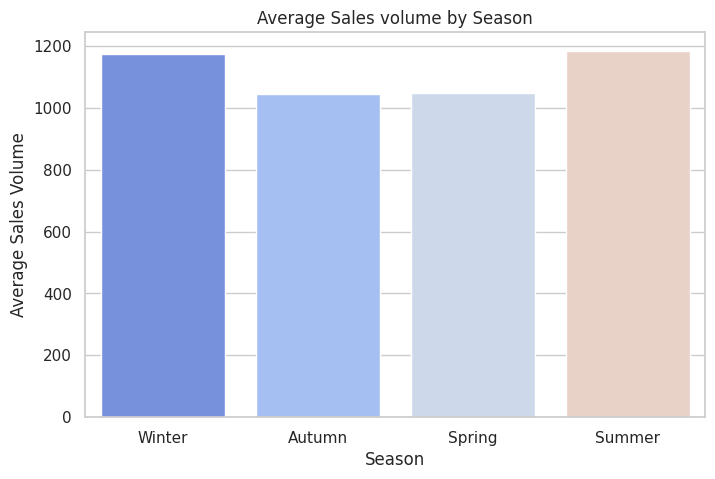

In [14]:
#Sales Volume By Season
plt.figure(figsize=(8,5))
sns.barplot(x="season",y="Sales Volume",data=df,ci=None, errorbar=None)
plt.title("Average Sales volume by Season")
plt.ylabel("Average Sales Volume")
plt.xlabel("Season")
plt.show()

The Sales data reveals clear seasonal trends in Zara's performance throughout the year. Among all four seasons, winter and Summer stand out as the strongest sales periods, both surpassing 1150 units in average sales volume. This pattern suggests that Zara experience high customer demand during Extreme-weather seasons - Possibly driven bt new collections (e.g. coats, jackets, and sweaters in winters, or light dresses and vacation wear in summer). 

In contrast, Autumn and Spring show slightly lower sales, averaging around 1040 - 1060 units. These moderate figures might correspond to transitional shopping periods, when customers are less inclined to make large waredrobe update.

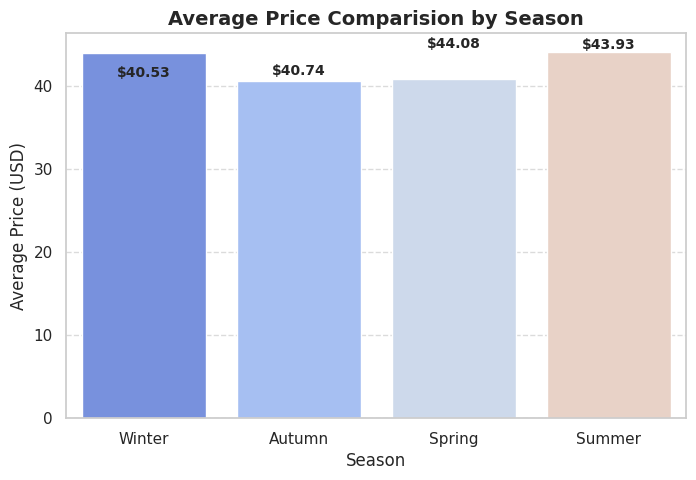

In [15]:
#Price By Season co,5mperision Graph
plt.figure(figsize=(8,5))
sns.barplot(x="season",y="price",data=df, errorbar=None)

#Add details
plt.title("Average Price Comparision by Season", fontsize = 14, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Price (USD)",fontsize=12)
plt.grid(axis="y", linestyle="--",alpha=0.7)

#Show Values on bars
for i, val in enumerate(df.groupby("season")["price"].mean().round(2)):
    plt.text(i,val+0.5,f"${val}",ha="center",fontsize=10,fontweight="bold")

plt.show()

We analyzed Zara's seasonal sales data, focusing on:

- Average Sales Volume (Units Sold)
- Average Price per Item (USD)

across Winter, Spring, Summer and Autumn

Zara's Seasonal data tell a Clear Story of strategic balance - 

**"Sell more in Winter, earn more in spring."**



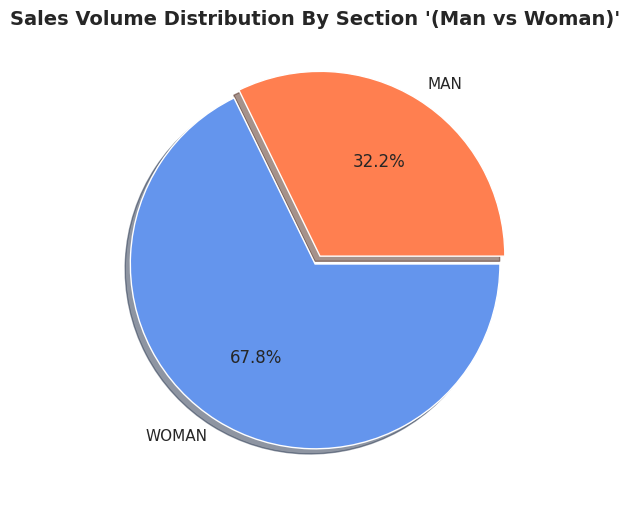

In [16]:
#Sales Volume by Section (Man vs Women)
#Group by Section and Sum up total sales volume
section_sales = df.groupby('section')['Sales Volume'].sum()

#Pie Chart Ploting
plt.figure(figsize=(6,6))
plt.pie(
    section_sales,
    labels=section_sales.index,
    autopct='%1.1f%%',
    colors = ["#ff7f50","#6495ed"],
    explode = (0.05, 0),
    shadow = True
)

plt.title("Sales Volume Distribution By Section '(Man vs Woman)'", fontsize=14, fontweight="bold")
plt.show()

The Pie Chart illustrates the Sales volume distribution between men's and women's sections.  A clear trend emerges - the women's section dominates sales, accounting for 67.8% of total sales, while the men's section contributes 32.2%.

This indicates that female customers are either purchasing more items, or the women's product line has a wider veriety and stronger demand. It may also reflect marketing strategies that better resonate with women or a larger prooduct protfolio tailored for them.

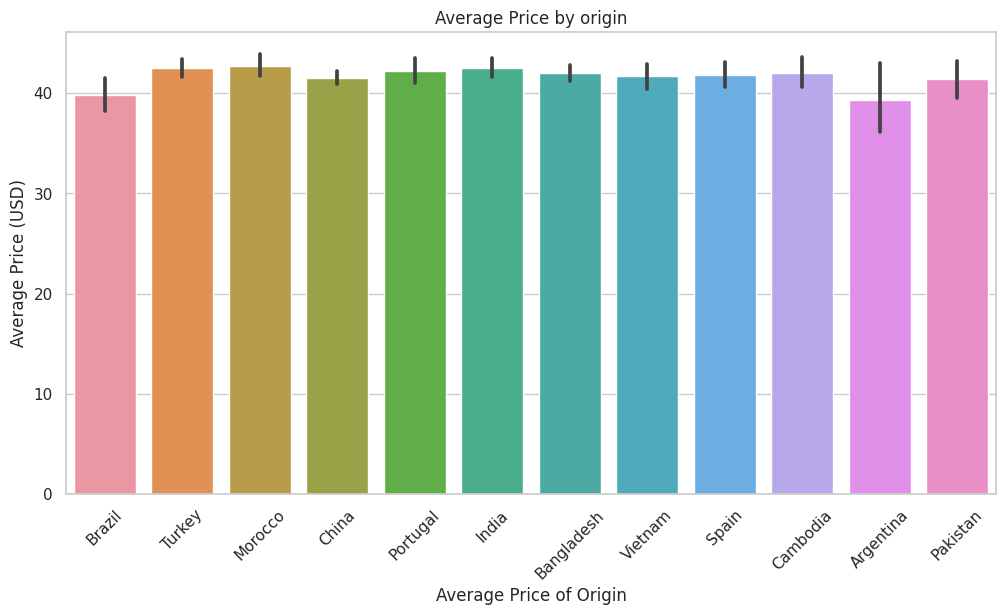

In [19]:
#Price By Origin
plt.figure(figsize=(12,6))
sns.barplot(x="origin", y="price", data=df)
plt.title("Average Price by origin")
plt.ylabel("Average Price (USD)")
plt.xlabel("Average Price of Origin")
plt.xticks(rotation=45)
plt.show()

The Analysis reveals a globally consistent pricing landscape, with Turkey and Morocco leading as premium origins and Brazil and Argentina offering competitive price advantages. This balance suggests a well-structured pricing approach that aligns with both quality and affordability-a strong foundation for strategic market positioning.

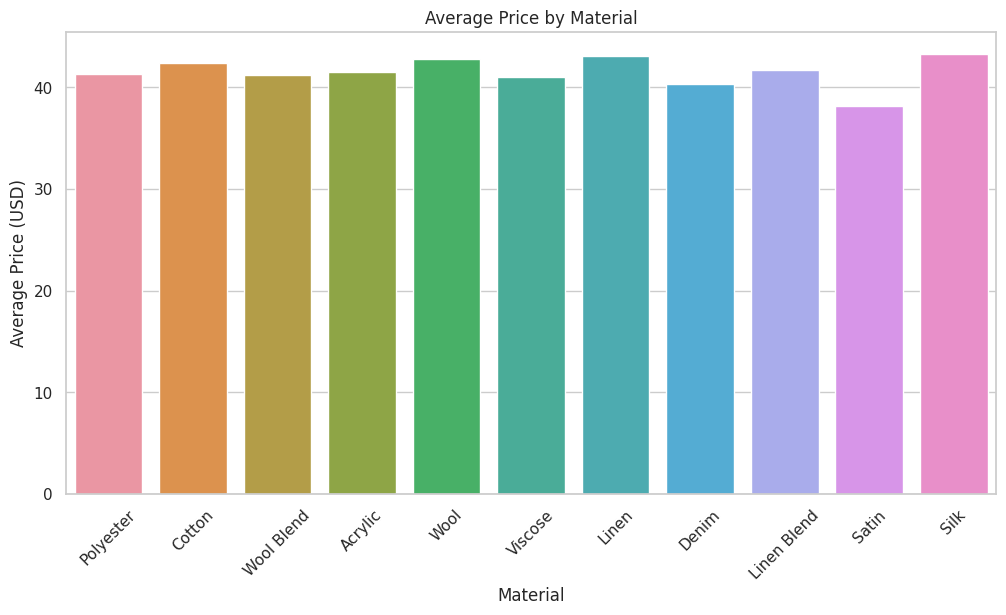

In [22]:
#Price by Meterials
plt.figure(figsize=(12,6))
sns.barplot(x="material",y="price", data=df,errorbar=None)
plt.title("Average Price by Material")
plt.ylabel("Average Price (USD)")
plt.xlabel("Material")
plt.xticks(rotation=45)
plt.show()

The bar chart shows the average product price (USD) based on material type. It highlights how different fabrics influence product pricing, reflecting variations in quality, production cost and market demand.

The pricing trend reveals that luxurious materials like silk, linen and wool dominate the higher end of the market, while blended fibres maintain balanced accessible pricing. This balance between quality and affordability indicates a diverse product strategy that caters to both premium and budget-conscious customers.

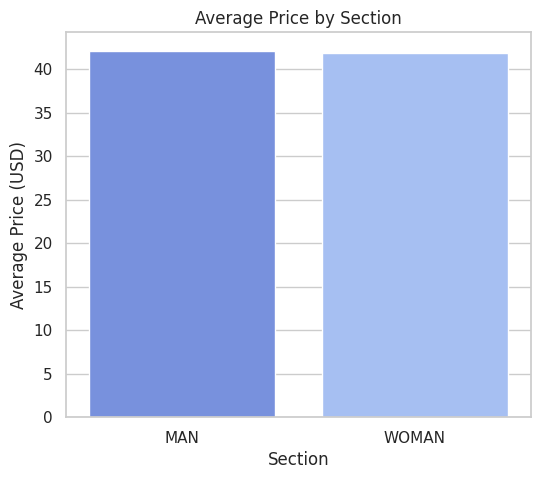

In [23]:
#Price by Section
plt.figure(figsize=(6, 5))
sns.barplot(x="section", y="price", data=df, errorbar=None)
plt.title("Average Price by Section")
plt.ylabel("Average Price (USD)")
plt.xlabel("Section")
plt.show()

The bar chart presents the average price of products categorized by gender section (Man vs Woman). Interestingly, the average prices are nearly identical, with men’s products having a slightly higher average price (around $42.2 USD) compared to women’s products (approximately $41.8 USD).

# Features Engineering

In [25]:
#Convert numeric Columns
df["Sales Volume"] = pd.to_numeric(df["Sales Volume"], errors="coerce")
df["Price"] = pd.to_numeric(df["price"], errors="coerce")

In [26]:
#Drop missing values for main numeric columns
df = df.dropna(subset=["Sales Volume","price"])

In [30]:
#List of Irrelevent Columns
cols_to_drop = [
    "Product ID",
    "Product Position",
    "Promotion",
    "Product Category",
    "brand",
    "url",
    "name",
    "description",
    "currency",
    "terms"
]

In [31]:
#Drop the Columns Safely (ignore if missing)
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors="ignore")

In [32]:
#Display remaining Columns
print("Remaining Columns after cleanup")
print(df.columns.tolist())

Remaining Columns after cleanup
['Seasonal', 'Sales Volume', 'price', 'section', 'season', 'material', 'origin', 'Price']


In [33]:
#Quick Preview
print("\nSample Data:")
print(df.head())


Sample Data:
  Seasonal  Sales Volume  price section  season    material   origin  Price
0      Yes          1243  78.99     MAN  Winter   Polyester   Brazil  78.99
1       No          1429  14.99     MAN  Autumn      Cotton   Turkey  14.99
2      Yes          1168  71.95   WOMAN  Autumn   Polyester  Morocco  71.95
3       No          1348  30.99     MAN  Spring   Polyester    China  30.99
4      Yes          1602  22.99   WOMAN  Winter  Wool Blend    China  22.99


# **Encoding Categorial Data**

In [34]:
#Check current columns
print("Columns before encoding:\n",df.columns.tolist())

Columns before encoding:
 ['Seasonal', 'Sales Volume', 'price', 'section', 'season', 'material', 'origin', 'Price']
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [35]:
#Identify Categorial columns automatically (Object type)
categorial_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("\nCateforical Columns to encode:\n",categorial_cols)


Cateforical Columns to encode:
 ['Seasonal', 'section', 'season', 'material', 'origin']


In [36]:
#One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorial_cols, drop_first = True)

print("\nColumnsa after encoding:\n",df_encoded.columns.tolist())
print("\nEncoded data sample")
print(df_encoded.head())


Columnsa after encoding:
 ['Sales Volume', 'price', 'Price', 'Seasonal_Yes', 'section_WOMAN', 'season_Spring', 'season_Summer', 'season_Winter', 'material_Cotton', 'material_Denim', 'material_Linen', 'material_Linen Blend', 'material_Polyester', 'material_Satin', 'material_Silk', 'material_Viscose', 'material_Wool', 'material_Wool Blend', 'origin_Bangladesh', 'origin_Brazil', 'origin_Cambodia', 'origin_China', 'origin_India', 'origin_Morocco', 'origin_Pakistan', 'origin_Portugal', 'origin_Spain', 'origin_Turkey', 'origin_Vietnam']

Encoded data sample
   Sales Volume  price  Price  Seasonal_Yes  section_WOMAN  season_Spring  \
0          1243  78.99  78.99          True          False          False   
1          1429  14.99  14.99         False          False          False   
2          1168  71.95  71.95          True           True          False   
3          1348  30.99  30.99         False          False           True   
4          1602  22.99  22.99          True           Tr

In [38]:
df_encoded.head()

,Sales Volume,price,Price,Seasonal_Yes,section_WOMAN,season_Spring,season_Summer,season_Winter,material_Cotton,material_Denim,...,origin_Brazil,origin_Cambodia,origin_China,origin_India,origin_Morocco,origin_Pakistan,origin_Portugal,origin_Spain,origin_Turkey,origin_Vietnam
0,1243,78.99,78.99,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,1429,14.99,14.99,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,1168,71.95,71.95,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1348,30.99,30.99,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1602,22.99,22.99,True,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


# Split into Features (X) and Target (Y)

In [41]:
#Target Variable
y = df_encoded["Sales Volume"]

#Features (drop target)
X = df_encoded.drop("Sales Volume",axis=1)

In [42]:
print("Feature Shape: ",X.shape)
print("Target Shape: ",y.shape)

Feature Shape:  (20250, 28)
Target Shape:  (20250,)


# Model Training

**RandomForest Regressor**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42
)

In [46]:
#Model Training
model = RandomForestRegressor(
    n_estimators = 200,
    random_state = 42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [47]:
#Evaluation
y_pred = model.predict(X_test)

In [49]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [50]:
print("\n=========================Model Performance================================")
print(f"R2 Score      :{r2:.4f}")
print(f"MAE           :{mae:.4f}")
print(f"MSE           :{mse:.4f}")
print(f"RMSE          :{rmse:.4f}")


=========================Model Performance================================
R2 Score      :0.5025
MAE           :143.4247
MSE           :42005.7537
RMSE          :204.9531


**Linear Regression Model**

In [54]:
#Train Linear Regression Model
lr_model = LinearRegression()

In [55]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [56]:
#Predict and Evaluate
y_pred = lr_model.predict(X_test)

In [57]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [58]:
print("\n=========================Model Performance================================")
print(f"R2 Score      :{r2:.4f}")
print(f"MAE           :{mae:.4f}")
print(f"MSE           :{mse:.4f}")
print(f"RMSE          :{rmse:.4f}")


=========================Model Performance================================
R2 Score      :0.2344
MAE           :228.8881
MSE           :64642.2345
RMSE          :254.2484


In [59]:
#2 Model Comperision Graph
models = ["Random Forest", "Linear Regression"]

#metrics
r2_scores = [0.5025, 0.2344]
mae_scores = [143.4247, 228.8881]
rmse_scores = [204.9531, 254.2484]

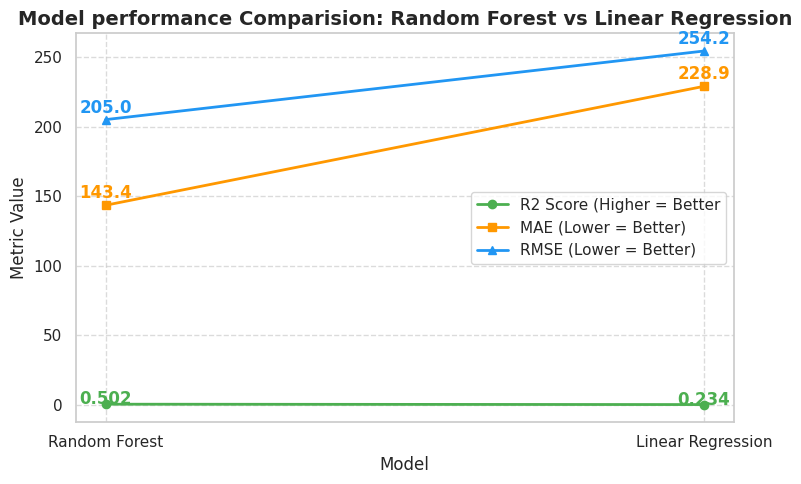

In [62]:
#Create Figure
plt.figure(figsize=(8,5))

plt.plot(models, r2_scores, marker = "o", label="R2 Score (Higher = Better",color="#4CAF50", linewidth=2)
plt.plot(models, mae_scores, marker="s", label="MAE (Lower = Better)", color="#FF9800",linewidth=2)
plt.plot(models, rmse_scores, marker="^", label="RMSE (Lower = Better)",color="#2196F3", linewidth=2)

#Add labels and title
plt.title("Model performance Comparision: Random Forest vs Linear Regression", fontsize=14, fontweight="bold")
plt.xlabel("Model",fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha = 0.7)

#Add Value labels on each point
for i in range(len(models)):
    plt.text(models[i], r2_scores[i]+0.02, f"{r2_scores[i]:.3f}", color="#4CAF50", ha="center", fontweight="bold")
    plt.text(models[i], mae_scores[i]+5, f"{mae_scores[i]:.1f}", color="#FF9800", ha='center', fontweight="bold")
    plt.text(models[i], rmse_scores[i]+5, f"{rmse_scores[i]:.1f}", color="#2196F3", ha="center", fontweight="bold")


plt.tight_layout()
plt.show()

The green line (R² Score) — higher is better.

The orange (MAE) and blue (RMSE) — lower values indicate better accuracy.

You’ll clearly see Random Forest above the Linear Regression for R², and below for MAE/RMSE → confirming it’s the stronger model.

# Predict Sales Volume for New Product

In [64]:
new_product = {
    "price":50,
    "section":"WOMAN",
    "season":"Winter",
    "material": "Cotton",
    "origin":"Bangladesh"
}

In [66]:
#Convert to Datafram
new_df = pd.DataFrame([new_product])

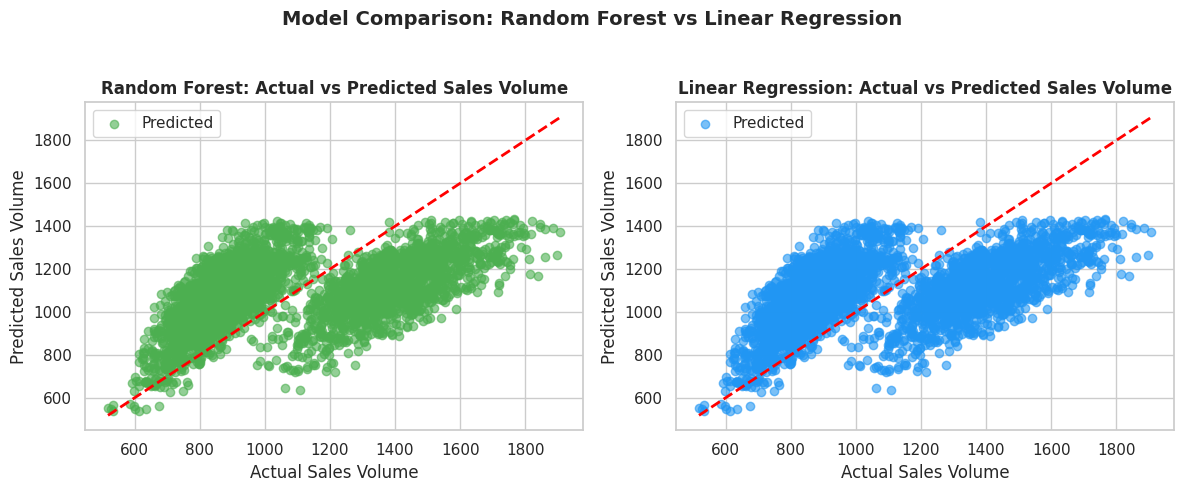

In [72]:
# Create a figure with two subplots
plt.figure(figsize=(12,5))

# --- Left: Random Forest ---
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color="#4CAF50", alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Random Forest: Actual vs Predicted Sales Volume", fontsize=12, fontweight='bold')
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.legend()

# --- Right: Linear Regression ---
# Re-run predictions for Linear Regression if not already done
y_pred_lr = lr_model.predict(X_test)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, color="#2196F3", alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Linear Regression: Actual vs Predicted Sales Volume", fontsize=12, fontweight='bold')
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.legend()

plt.suptitle("Model Comparison: Random Forest vs Linear Regression", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The model comparison reveals that while both algorithms follow the general sales trend, the Random Forest model demonstrates far superior predictive accuracy and consistency. Its predictions closely align with actual sales, making it a more robust and practical choice for forecasting real-world sales behavior compared to the more rigid Linear Regression model.

In [70]:
#Apply the same one-hot encoding as training data
new_df_encoded = pd.get_dummies(new_df)

#Align encoded columns with model's training data
#(Add any missing columns as 0 to match X columns)
new_df_encoded = new_df_encoded.reindex(columns = X.columns, fill_value=0)

#Predict Sales Volume
predicted_sales = model.predict(new_df_encoded)

print("Predicted Sales Volume for new product:", round(predicted_sales[0], 2))

Predicted Sales Volume for new product: 1441.19


# THE END